In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 7.0)

In [74]:
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017/')
db = client.spotify

In [95]:
cursor = db.tracks.find()
tracks = []

for track in cursor:
    track = {
        'id':track['id'],
        'name':track['name'],
        'album':track['album']['name'],
        'artist':', '.join([artist['name'] for artist in track['artists']]),
        'popularity': track['popularity'],
        'danceability':track['audio_features']['danceability'],
        'energy':track['audio_features']['energy'],
        'acousticness':track['audio_features']['acousticness'],
        'valence':track['audio_features']['valence']
    }
    tracks.append(track)

df_tracks = pd.json_normalize(tracks)

In [96]:
df_tracks.head(10)

,id,name,album,artist,popularity,danceability,energy,acousticness,valence
0,2dxjKgT0li4qBI3QwuN9Ih,Touch The Sky,Late Registration,"Kanye West, Lupe Fiasco",66,0.524,0.846,0.011400,0.551
1,4EnaOPZZ6tla9TWsRQaxYk,Write at Home,Radio Silence,"Talib Kweli, Datcha, Bilal, Robert Glasper",20,0.614,0.540,0.054000,0.156
2,4FIMqjMdiZkTRcaqgES0ya,You,The Renaissance,Q-Tip,24,0.532,0.848,0.484000,0.722
3,1jdlyu1JvtENUlxXntEife,The Life,Blak And Blu,Gary Clark Jr.,29,0.682,0.796,0.017200,0.761
4,769O71M6bzhU3ZXm1xF6VW,"No Wrong No Right (feat. Robert Glasper, James...",3ChordFold,Terrace Martin,21,0.572,0.641,0.002720,0.343
5,5HS9dpiLOAT03qgv3lP5cR,Universal Language,Chris Dave And The Drumhedz,Chris Dave and The Drumhedz,23,0.635,0.709,0.281000,0.622
6,0SPUNC31ZXVbadaj4M5TfD,Dumb It Down,Lupe Fiasco's The Cool,"Lupe Fiasco, Gemstones, Graham Burris",37,0.703,0.768,0.147000,0.102
7,1SgHNH36l41IIhuYGY4VCa,Pass Me Over,Ain't Nobody Worryin',Anthony Hamilton,39,0.544,0.557,0.261000,0.482
8,0FNPiAAdWdWaGr7JOnlKmi,Imagine,Tha Blue Carpet Treatment,"Snoop Dogg, Dr. Dre, D'Angelo",55,0.803,0.627,0.286000,0.638
9,4hdeaFADWgq7KRByXqSwHq,All Matter,Airtight's Revenge,Bilal,21,0.571,0.881,0.000113,0.636


In [97]:
df_tracks.sort_values('popularity', ascending=False).head(10)

,id,name,album,artist,popularity,danceability,energy,acousticness,valence
330,5hVghJ4KaYES3BFUATCYn0,EARFQUAKE,IGOR,"Tyler, The Creator",83,0.554,0.498,0.23000,0.413
654,2374M0fQpWi3dLnB54qaLX,Africa,Toto IV,TOTO,83,0.671,0.373,0.25700,0.732
789,4u7EnebtmKWzUH433cf5Qv,Bohemian Rhapsody - 2011 Mix,A Night At The Opera (2011 Remaster),Queen,83,0.414,0.404,0.27100,0.224
1546,0wXuerDYiBnERgIpbb3JBR,Redbone,"""Awaken, My Love!""",Childish Gambino,82,0.743,0.347,0.16700,0.572
472,6dGnYIeXmHdcikdzNNDMm2,Here Comes The Sun - Remastered 2009,Abbey Road (Remastered),The Beatles,82,0.557,0.540,0.03390,0.394
801,3gdewACMIVMEWVbyb8O9sY,"Rocket Man (I Think It's Going To Be A Long, L...",Honky Chateau,Elton John,81,0.601,0.532,0.43200,0.341
358,0d28khcov6AiegSCpG5TuT,Feel Good Inc.,Demon Days,Gorillaz,80,0.818,0.705,0.00836,0.772
985,7tqhbajSfrz2F7E1Z75ASX,Ain't No Mountain High Enough,United,"Marvin Gaye, Tammi Terrell",80,0.663,0.600,0.43000,0.800
144,3dhjNA0jGA8vHBQ1VdD6vV,I Feel It Coming,Starboy,"The Weeknd, Daft Punk",80,0.773,0.819,0.42800,0.585
733,4fzsfWzRhPawzqhX8Qt9F3,Stronger,Graduation,Kanye West,80,0.617,0.717,0.00564,0.490


Text(0.5, 1.0, 'valence')

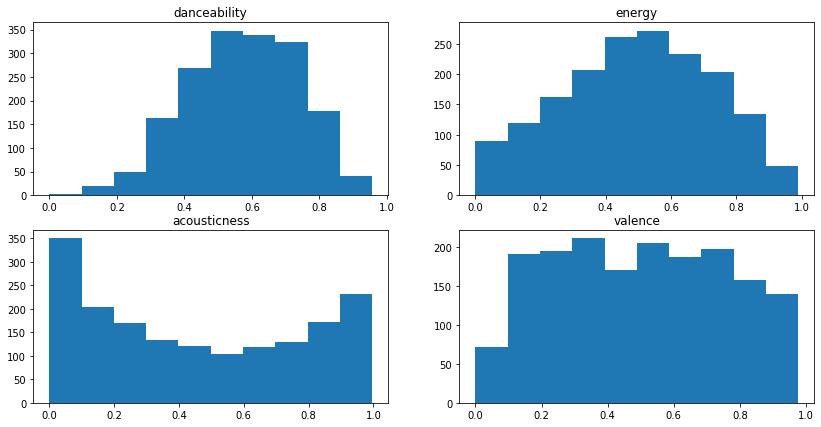

In [104]:
plt.figure()
# danceability
plt.subplot(221)
plt.hist(df_tracks['danceability'])
plt.title('danceability')
#energy
plt.subplot(222)
plt.hist(df_tracks['energy'])
plt.title('energy')
#acousticness
plt.subplot(223)
plt.hist(df_tracks['acousticness'])
plt.title('acousticness')
#valence
plt.subplot(224)
plt.hist(df_tracks['valence'])
plt.title('valence')

In [100]:
df_tracks[['name','album','artist','valence']].sort_values('valence', ascending=False).head(10)

,name,album,artist,valence
750,It's The Same Old Song,Four Tops Second Album,Four Tops,0.977
1374,Eu Vou Torcer,A Tabua De Esmeralda,Jorge Ben Jor,0.977
389,La Illaha Illa Allah,"Soirées Gnawa Neurasys Remaster, Vol. 5",Hamid El Kasri,0.971
390,Kamil Ladou,"Soirées Gnawa Neurasys Remaster, Vol.10",Hamid El Kasri,0.971
660,You Know What I Mean,Blow By Blow,Jeff Beck,0.971
381,Feira de Mangaio,Cada um Belisca um Pouco,"Dominguinhos, Sivuca, Oswaldinho",0.970
1063,Lady Day and John Coltrane,The Revolution Will Not Be Televised,Gil Scott-Heron,0.969
1401,When It Comes Down To It,Adventures In Paradise,Minnie Riperton,0.968
825,Bottom's Up,Bottom's Up,"Victor Bailey, Victor Bailey bass/keyboards/vo...",0.967
1411,The Seed (2.0),Phrenology,"The Roots, Cody Chesnutt",0.966


In [101]:
df_tracks[['name','album','artist','energy']].sort_values('energy', ascending=False).head(10)

,name,album,artist,energy
1195,When Doves Cry,Purple Rain,Prince,0.989
873,Soul With A Capital 'S',T.O.P.,Tower Of Power,0.972
625,Calm Like a Bomb,The Battle Of Los Angeles,Rage Against The Machine,0.970
1020,Jefe,Culcha Vulcha,Snarky Puppy,0.969
990,Move on Up,Move on Up,Curtis Mayfield,0.969
593,Forró Brasil,Ao Vivo (Remasterizado),Hermeto Pascoal,0.966
923,How Could You Break My Heart,Roads of Life,Bobby Womack,0.964
704,Crosstown Traffic,Electric Ladyland,Jimi Hendrix,0.963
301,Teddy Picker,Favourite Worst Nightmare,Arctic Monkeys,0.963
375,Public Interest,Beat Music,Mark Guiliana,0.958


In [102]:
df_tracks[['name','album','artist','danceability']].sort_values('danceability', ascending=False).head(10)

,name,album,artist,danceability
142,Around the World,Homework,Daft Punk,0.956
1474,The Light,Like Water For Chocolate,Common,0.939
950,You're The Reason Why,The Long Way Home,Aaron Taylor,0.935
1002,Mad Issues,Mahogany Soul,Angie Stone,0.918
1456,Devil's Pie,Voodoo,D'Angelo,0.917
1512,Who Is He And What Is He To You,Peace Beyond Passion,Meshell Ndegeocello,0.914
1453,Feel Like Makin' Love,Voodoo,D'Angelo,0.913
216,Boogie Down,Jarreau,Al Jarreau,0.913
1180,Workin' Day and Night,Off the Wall,Michael Jackson,0.907
966,Crying Shame,Half Mile Harvest,The Teskey Brothers,0.903


In [103]:
df_tracks[['name','album','artist','acousticness']].sort_values('acousticness', ascending=False).head(10)

,name,album,artist,acousticness
955,Gnossienne: No. 1,Satie: Avant-dernières pensées (Bonus Track Ve...,"Erik Satie, Alexandre Tharaud",0.996
321,"Goldberg Variations, BWV 988: Aria","Bach: The Goldberg Variations, BWV 988 (1981 G...","Johann Sebastian Bach, Glenn Gould",0.995
1726,I'm Gettin' Sentimental Over You,Undercurrent,"Bill Evans, Jim Hall",0.995
269,Romain,Undercurrent,"Bill Evans, Jim Hall",0.995
416,Smile,Hollywood Africans,Jon Batiste,0.995
696,Ballad Z,Jim Hall & Pat Metheny,"Jim Hall, Pat Metheny",0.995
1729,I Hear A Rhapsody,Undercurrent,"Bill Evans, Jim Hall",0.995
84,Lilac,Mockroot,Tigran Hamasyan,0.994
185,What Are You Doing The Rest Of Your Life?,From Left To Right (Expanded Edition),Bill Evans,0.993
1605,Interlude No. 3,The Mourning of a Star,Keith Jarrett,0.993


In [105]:
audio_features = df_tracks[['danceability','energy','acousticness','valence']]
audio_features.describe()

,danceability,energy,acousticness,valence
count,1730.000000,1730.00000,1730.000000,1730.000000
mean,0.571191,0.49564,0.451230,0.498242
std,0.164131,0.22748,0.330361,0.256640
min,0.000000,0.00211,0.000113,0.000000
25%,0.452250,0.33600,0.137250,0.283000
50%,0.578000,0.50450,0.407500,0.497000
75%,0.695750,0.67000,0.776500,0.713000
max,0.956000,0.98900,0.996000,0.977000


In [125]:
np.cov(audio_features.values[:,0],audio_features.values[:,3])

array([[0.02693902, 0.02397951],
       [0.02397951, 0.06586384]])

In [124]:
np.corrcoef(audio_features.values[:,0],audio_features.values[:,3])

array([[1.        , 0.56928004],
       [0.56928004, 1.        ]])

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
X_scaled = StandardScaler().fit_transform(audio_features)

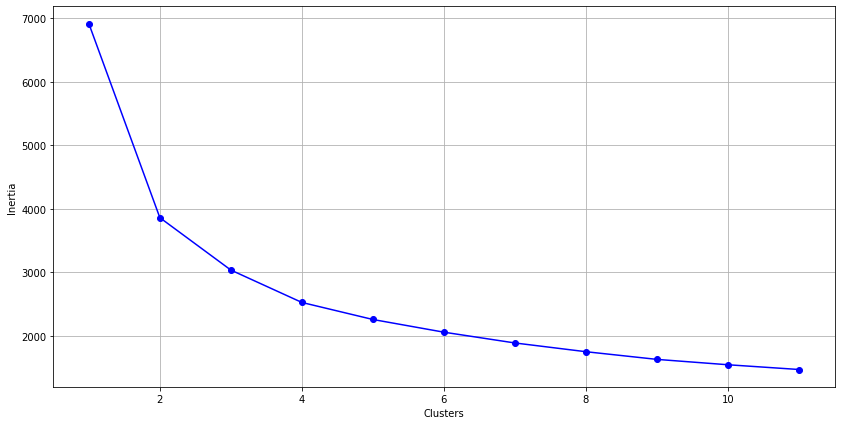

In [116]:
k = range(1,12,1)

#-- lista de inércias
inertias = []

#-- para cada valor de k, ache a inércia
for i in k:
    # crie a instância
    kmeans = KMeans(n_clusters=i)

    # Treine o modelo
    model = kmeans.fit(X_scaled)

    # Ache a inercia dos clusters
    inertias.append(model.inertia_)
    
plt.plot(k, inertias, '-ob')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [117]:
from sklearn.cluster import KMeans

n = 4
kmeans = KMeans(n_clusters=n)

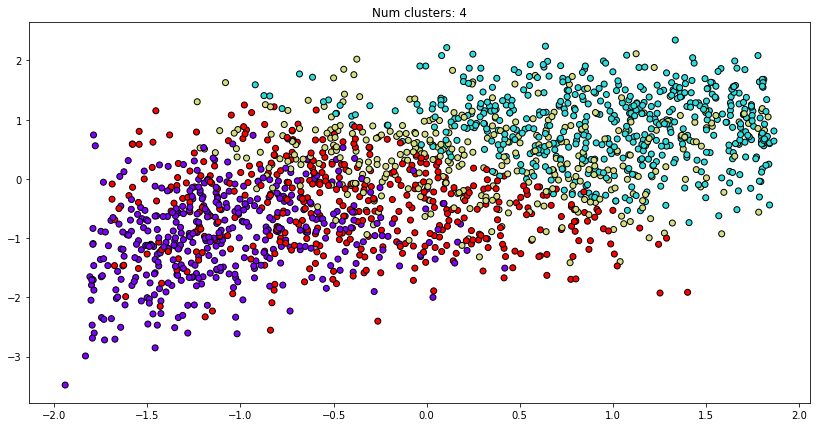

In [119]:
kmeans.fit(X_scaled)
labels = kmeans.labels_

plt.scatter(x=X_scaled[:,3],
            y=X_scaled[:,0],
            c=labels.astype(np.float),
            cmap='rainbow',
            edgecolor='k')
plt.title('Num clusters: {}'.format(n))
plt.show()

In [126]:
labels = kmeans.fit_predict(X_scaled)

In [127]:
#-- verificando o balanceamento dos clusters
label, count = np.unique(labels, return_counts=True)
for l, c in zip(label,count):
    print('Cluster {}: {}'.format(l,c))

Cluster 0: 364
Cluster 1: 529
Cluster 2: 416
Cluster 3: 421


In [129]:
df_tracks = df_tracks.join(pd.DataFrame(labels, columns=['cluster']))

### Exibe as infromações dos clusters

In [134]:
clusters = df_tracks \
    .groupby('cluster') \
    .agg('mean')

clusters

,popularity,danceability,energy,acousticness,valence
cluster,,,,,
0,34.348901,0.631783,0.431723,0.657070,0.575712
1,38.733459,0.718837,0.657854,0.190636,0.743896
2,32.552885,0.414280,0.217712,0.848877,0.218800
3,35.890736,0.488325,0.621701,0.207780,0.398711


In [138]:
df_tracks[df_tracks['cluster']==3]

,id,name,album,artist,popularity,danceability,energy,acousticness,valence,cluster
0,2dxjKgT0li4qBI3QwuN9Ih,Touch The Sky,Late Registration,"Kanye West, Lupe Fiasco",66,0.524,0.846,0.01140,0.551,3
1,4EnaOPZZ6tla9TWsRQaxYk,Write at Home,Radio Silence,"Talib Kweli, Datcha, Bilal, Robert Glasper",20,0.614,0.540,0.05400,0.156,3
4,769O71M6bzhU3ZXm1xF6VW,"No Wrong No Right (feat. Robert Glasper, James...",3ChordFold,Terrace Martin,21,0.572,0.641,0.00272,0.343,3
6,0SPUNC31ZXVbadaj4M5TfD,Dumb It Down,Lupe Fiasco's The Cool,"Lupe Fiasco, Gemstones, Graham Burris",37,0.703,0.768,0.14700,0.102,3
7,1SgHNH36l41IIhuYGY4VCa,Pass Me Over,Ain't Nobody Worryin',Anthony Hamilton,39,0.544,0.557,0.26100,0.482,3
...,...,...,...,...,...,...,...,...,...,...
1686,1HUWYxXGQMQ63QkIdi6omV,Love Having You Around,Music Of My Mind,Stevie Wonder,33,0.629,0.759,0.45500,0.491,3
1697,0iJP3XxZNE8tP7YnB23J1r,Someday We'll All Be Free,Extension Of A Man,Donny Hathaway,32,0.379,0.413,0.45100,0.249,3
1706,2qyqM3EcFc3s5MNlnJpiTJ,Mr. Clean,Straight Life,Freddie Hubbard,6,0.390,0.696,0.27100,0.818,3
1708,2lSyDjRL30hdy74gDM9x3L,One for Duke,Skull Session,Oliver Nelson,0,0.497,0.641,0.43200,0.383,3


In [137]:
for track in df_tracks.itertuples():
    update = {'cluster':track.cluster}
    db.tracks.update({'id':track.id},{"$set": update}, upsert=False)

D:\Programas\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: update is deprecated. Use replace_one, update_one or update_many instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
from sklearn.neighbors import KNeighborsClassifier